In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# fpath = "F:\\pp1_data_processing\\2023-05-22_21-17-37 dac showing pacman.csv"
fpath = "F:\\pp1_data_processing\\2023-05-22_22-36-06 dac showing pacman 200MHz.csv"
df = pd.read_csv(fpath)

In [78]:
# get all the falling edges of !vid_conv where the dac data is latched
diffs = df[' !VID_CONV'].diff()
dacdf = df.loc[diffs == -1].copy()
dacdf.reset_index(inplace=True, drop=True)
dacdf.drop(columns=' !VID_CONV', inplace=True)
dacdf

,Time[s],DAC0,DAC1,DAC2,DAC3,DAC4,DAC5,DAC6,DAC7,VID_BLK
0,-0.024999,1,1,1,1,0,1,0,0,0
1,-0.024999,1,1,1,1,1,1,0,0,0
2,-0.024998,1,0,1,0,1,1,0,0,0
3,-0.024998,1,0,1,0,1,1,0,0,0
4,-0.024998,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7159302,0.475001,1,1,0,0,0,1,0,0,0
7159303,0.475001,1,0,0,0,0,1,0,0,0
7159304,0.475001,1,0,1,0,0,1,1,0,0
7159305,0.475001,0,1,1,1,1,0,0,0,0


In [105]:
# convert binary columns to numpy
bits_arr = dacdf[[' DAC0', ' DAC1', ' DAC2', ' DAC3', ' DAC4', ' DAC5', ' DAC6', ' DAC7']].to_numpy()
# convert to decimal
decimal_arr = np.sum(bits_arr * (2**np.arange(0,8)), axis=1)
# store in new column
dacdf['VALUE'] = decimal_arr

# obtained from MC10322 datasheet page 4
voltage_when_0 = -663.0 # mV, aka Normal Black
voltage_when_255 = -73.0 # mV, aka Normal White
voltage_when_blk = -53.6 # mV, aka Blanking

# remap values to voltages
dacdf['VOLTAGE'] = (decimal_arr / 255) * (voltage_when_255 - voltage_when_0) + voltage_when_0 
dacdf.loc[dacdf[' VID_BLK'] == 1, 'VOLTAGE'] = voltage_when_blk
dacdf.head()

,Time[s],DAC0,DAC1,DAC2,DAC3,DAC4,DAC5,DAC6,DAC7,VID_BLK,VALUE,VOLTAGE
0,-0.024999,1,1,1,1,0,1,0,0,0,47,-554.254902
1,-0.024999,1,1,1,1,1,1,0,0,0,63,-517.235294
2,-0.024998,1,0,1,0,1,1,0,0,0,53,-540.372549
3,-0.024998,1,0,1,0,1,1,0,0,0,53,-540.372549
4,-0.024998,1,0,0,0,0,0,1,0,0,65,-512.607843


C:\Users\ionca\AppData\Local\Temp\ipykernel_7044\1446914792.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dacdf.iloc[0:1000,].plot(x='Time[s]', y=['VALUE', ' VID_BLK', 'VOLTAGE'], subplots=True, ax=ax)


array([<Axes: xlabel='Time[s]'>, <Axes: xlabel='Time[s]'>,
       <Axes: xlabel='Time[s]'>], dtype=object)

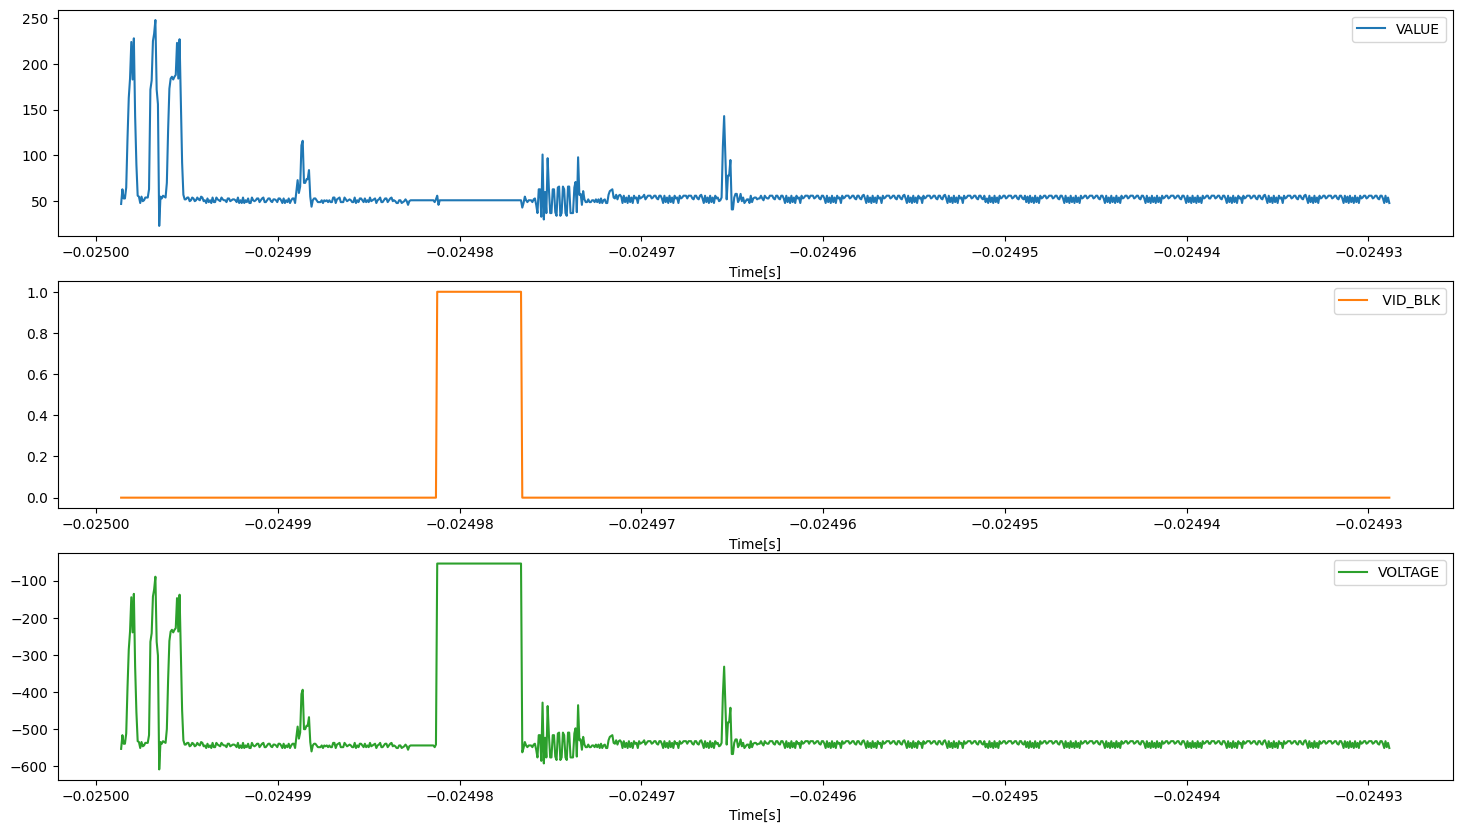

In [106]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
dacdf.iloc[0:1000,].plot(x='Time[s]', y=['VALUE', ' VID_BLK', 'VOLTAGE'], subplots=True, ax=ax)

C:\Users\ionca\AppData\Local\Temp\ipykernel_7044\2295092173.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dacdf.iloc[80000:90000,].plot(x='Time[s]', y=['VALUE', ' VID_BLK', 'VOLTAGE'], subplots=True, ax=ax)


array([<Axes: xlabel='Time[s]'>, <Axes: xlabel='Time[s]'>,
       <Axes: xlabel='Time[s]'>], dtype=object)

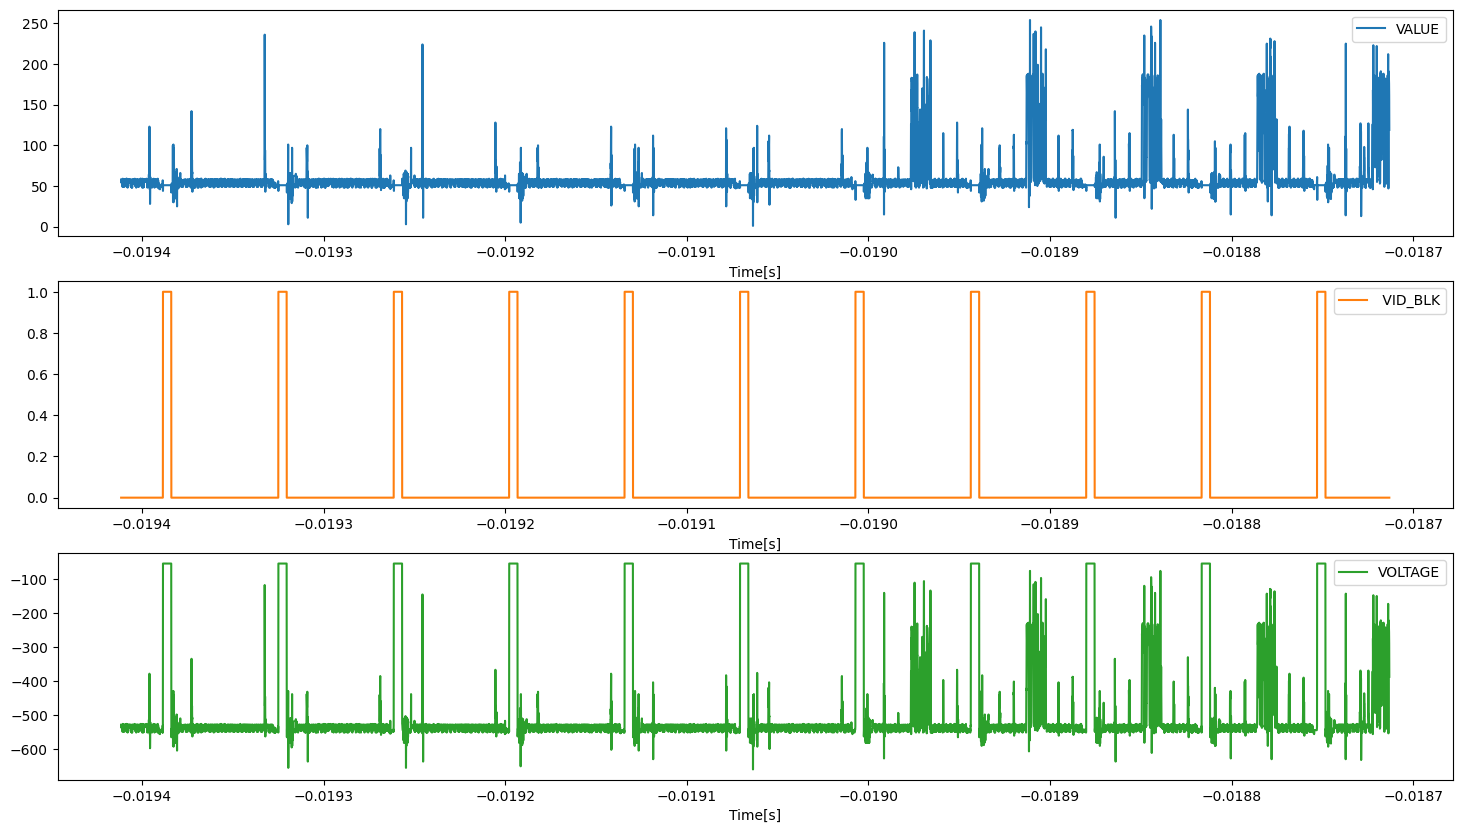

In [118]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
dacdf.iloc[80000:90000,].plot(x='Time[s]', y=['VALUE', ' VID_BLK', 'VOLTAGE'], subplots=True, ax=ax)